In [73]:
pip install scikit-learn

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import urllib.request
import warnings
warnings.filterwarnings('ignore')


In [75]:
df= pd.read_csv('baseball.csv')

In [76]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [77]:
df.shape

(30, 17)

In [78]:
df.describe

<bound method NDFrame.describe of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278 

In [79]:
df.sample(n=10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
18,68,655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,40,116
17,97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
14,68,694,5600,1405,277,46,146,475,1119,78,729,664,4.14,5,15,28,126
15,100,647,5484,1386,288,39,137,506,1267,69,525,478,2.94,1,15,62,96
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77


In [80]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

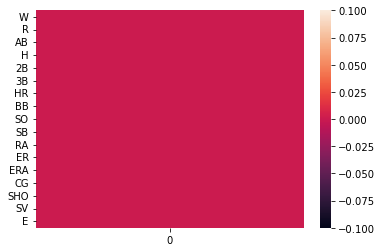

In [81]:
# checking for null value
sns.heatmap(data.isnull().sum().to_frame())
plt.show()

In [82]:
# Basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [83]:
import matplotlib.pyplot as plt

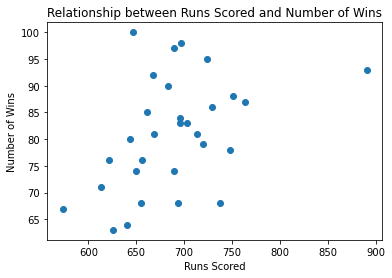

In [84]:
import matplotlib.pyplot as plt

plt.scatter(df['R'], df['W'])
plt.xlabel('Runs Scored')
plt.ylabel('Number of Wins')
plt.title('Relationship between Runs Scored and Number of Wins')
plt.show()


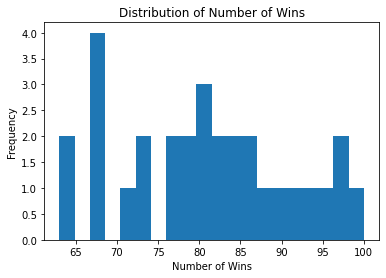

In [85]:
plt.hist(df['W'], bins=20)
plt.xlabel('Number of Wins')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Wins')
plt.show()

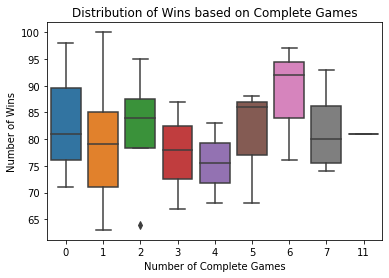

In [86]:
import seaborn as sns

sns.boxplot(x=df['CG'], y=df['W'])
plt.xlabel('Number of Complete Games')
plt.ylabel('Number of Wins')
plt.title('Distribution of Wins based on Complete Games')
plt.show()

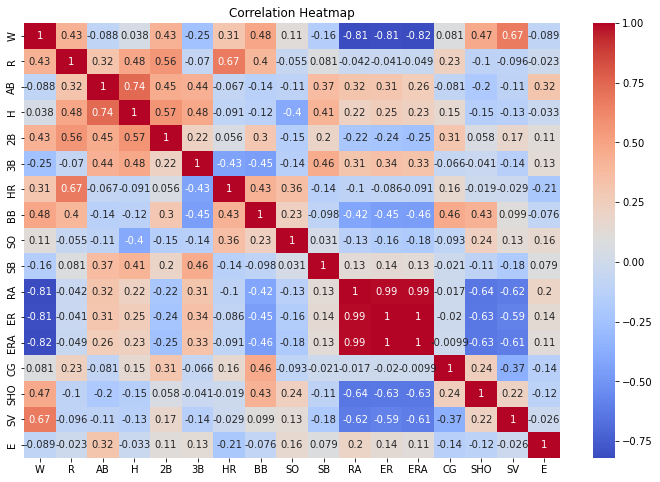

In [87]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [88]:
from sklearn.model_selection import train_test_split

# Separate the input features (X) and the target variable (y)
X = df.drop('W', axis=1)  # Input features (all columns except 'W')
y = df['W']               # Target variable ('W')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24, 16)
X_test shape: (6, 16)
y_train shape: (24,)
y_test shape: (6,)


In [89]:
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [90]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the Random Forest Regression model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Squared Error (MSE): 61.68513333333331
Root Mean Squared Error (RMSE): 7.853988371097408
R-squared: 0.5312086130462319


In [92]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their potential values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create an instance of the model
model = RandomForestRegressor()

# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Best Model - Mean Squared Error (MSE):", mse)
print("Best Model - Root Mean Squared Error (RMSE):", rmse)
print("Best Model - R-squared:", r2)
print("Best Model - Hyperparameters:", grid_search.best_params_)

Best Model - Mean Squared Error (MSE): 61.08826666666666
Best Model - Root Mean Squared Error (RMSE): 7.8158983275543354
Best Model - R-squared: 0.5357446485117163
Best Model - Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [93]:
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [94]:
from sklearn.linear_model import Lasso, LassoCV

In [102]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)

In [103]:
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [105]:
alpha = lasscv.alpha_
alpha

0.15561714272564198

In [106]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.15561714272564198)

In [107]:
lasso_reg.score(x_test,y_test)

0.7515588694033606

In [108]:
from sklearn.linear_model import Ridge, RidgeCV

In [115]:
ridgecv = RidgeCV(alphas=np.arange(0.001, 0.1, 0.01), normalize=True)

In [116]:
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [117]:
ridgecv.alpha_

0.09099999999999998

In [119]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [120]:
ridge_model.score(x_test,y_test)

0.7533682753230754